# Debugging whether or not the simulation includes the rear blocker
## @Milo
## January, 2018

#### The already "inclusion" of the Front blocker might be an effect of the way as the rays are generated since they are randomly created using the pupil af the FOXSI module as a key parameter (cross-section). The pupil already includes the front blocker. The rear blocker is removed in lines 105 and 106 of module.py

# Creating Rays

In [42]:
import numpy as np
from foxsisim.source import Source
from foxsisim.module import Module
Sdist = -1.5e13         ## cm
offaxisAngle = 0.0     ## arcmin
source = Source(type='point',center=[0, -Sdist * np.sin(np.deg2rad(offaxisAngle / 60.0)), Sdist ])
module = Module(radii = [3.17], core_radius=(3.17,0.))
n = 100
rays = source.generateRays(module.targetFront,n)
module.passRays(rays)
Rrays = [ray for ray in rays if (ray.tag != 'Source')] #kills the passthrough rays
from foxsisim.util import save_rays, load_rays
save_rays(Rrays,filename='../../../../Desktop/30rays_test.csv')
print(len(Rrays),' rays saved')
print('Done!')

Rays saved in file : ../../../../Desktop/30rays_test.csv
100  rays saved
Done!


### Testing the most inner Wolter-I of a 10-shell FOXSI module

### Using the modified version of FOXSISIM in branch pymilo/Random-Source-Debugging on February 2, 2018

Now, that we can introduce in the code the size of both the front and rear blocker, I want to test for an On-axis source at 1AU what happen for different size of front blocker and then for the rear blocker.

 # Optimizing FRONT Blocker size for NO Rear blocker

In [97]:
import numpy as np
from foxsisim.source import Source
from foxsisim.module import Module
from foxsisim.util import load_rays, save_rays
from foxsisim.detector import Detector

n = 10                 ## number of rays
Sdist = -1.5e13        ## cm
offaxisAngle = 0.0     ## arcmin

fbrs = np.arange(2.623,3.29,0.05) # Front blocker radius ranging from 2.623 cm to 3.273

#Create Source : 
source = Source(type='point',center=[0, -Sdist * np.sin(np.deg2rad(offaxisAngle / 60.0)), Sdist ])



All_Dx, All_Dy, All_Hx, All_Hy, All_Px, All_Py = [], [], [], [], [], []

for fbr in fbrs:
    print('Front radius: %f' % fbr)
    module = Module(radii = [3.17], core_radius=(fbr,0.))
    rays = source.generateRays(module.targetFront,n)
    module.passRays(rays)
    Rrays = [ray for ray in rays if (ray.tag != 'Source')] #kills the passthrough rays
    save_rays(Rrays,filename='/Users/Kamilobu/Desktop/rays_FB/rays_FBR_=_'+str(fbr)+'.csv')
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/rays_FB/rays_FBR_=_'+str(fbr)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    All_Hx.append(Hx)
    All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    All_Px.append(Px)
    All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    All_Dx.append(Dx)
    All_Dy.append(Dy)


Front radius: 2.623000
Rays saved in file : /Users/Kamilobu/Desktop/rays_FB/rays_FBR_=_2.623.csv
Rays from /Users/Kamilobu/Desktop/rays_FB/rays_FBR_=_2.623.csv loaded.
Front radius: 2.673000
Rays saved in file : /Users/Kamilobu/Desktop/rays_FB/rays_FBR_=_2.673.csv
Rays from /Users/Kamilobu/Desktop/rays_FB/rays_FBR_=_2.673.csv loaded.
Front radius: 2.723000
Rays saved in file : /Users/Kamilobu/Desktop/rays_FB/rays_FBR_=_2.723.csv
Rays from /Users/Kamilobu/Desktop/rays_FB/rays_FBR_=_2.723.csv loaded.
Front radius: 2.773000
Rays saved in file : /Users/Kamilobu/Desktop/rays_FB/rays_FBR_=_2.773.csv
Rays from /Users/Kamilobu/Desktop/rays_FB/rays_FBR_=_2.773.csv loaded.
Front radius: 2.823000
Rays saved in file : /Users/Kamilobu/Desktop/rays_FB/rays_FBR_=_2.823.csv
Rays from /Users/Kamilobu/Desktop/rays_FB/rays_FBR_=_2.823.csv loaded.
Front radius: 2.873000
Rays saved in file : /Users/Kamilobu/Desktop/rays_FB/rays_FBR_=_2.873.csv
Rays from /Users/Kamilobu/Desktop/rays_FB/rays_FBR_=_2.873.csv 

### Plotting Front blocker results

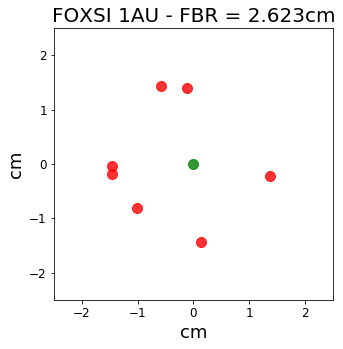

In [106]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(5,5))
plt.title('FOXSI 1AU - FBR = '+str(fbrs[0])+'cm',fontsize=20)
plt.xlabel('cm',fontsize=18)
plt.ylabel('cm',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.scatter(All_Hx[0],All_Hy[0],color='red',s=100.,alpha=0.8)
plt.scatter(All_Px[0],All_Py[0],color='blue',s=100.,alpha=0.8)
plt.scatter(All_Dx[0],All_Dy[0],color='green',s=100.,alpha=0.8)
plt.ylim(-2.5,2.5)
plt.xlim(-2.5,2.5)
plt.show()

#### Now that I have a good framework to generate and read the the rays, I'm going to split the code to do so in a much faster way.

In [214]:
fbrs

array([ 2.623,  2.673,  2.723,  2.773,  2.823,  2.873,  2.923,  2.973,
        3.023,  3.073,  3.123,  3.173,  3.223,  3.273])

In [139]:
from foxsisim.util import load_rays
import matplotlib.pyplot as plt 

fbrs = np.arange(2.623,3.29,0.05) # Front blocker radius ranging from 2.623 cm to 3.273

All_Drays, All_Hrays, All_Prays = [], [], []
All_Dx, All_Dy, All_Hx, All_Hy, All_Px, All_Py = [], [], [], [], [], []

for fbr in fbrs:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_FB/rays_FBR_=_'+str(fbr)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    All_Drays.append(Drays)
    All_Hrays.append(Hrays)
    All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    All_Hx.append(Hx)
    All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    All_Px.append(Px)
    All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    All_Dx.append(Dx)
    All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_FB/rays_FBR_=_2.623.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_FB/rays_FBR_=_2.673.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_FB/rays_FBR_=_2.723.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_FB/rays_FBR_=_2.773.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_FB/rays_FBR_=_2.823.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_FB/rays_FBR_=_2.873.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_FB/rays_FBR_=_2.923.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_FB/rays_FBR_=_2.973.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_FB/rays_FBR_=_3.023.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Mi

## Plot Front size blocker for No Rear blocker

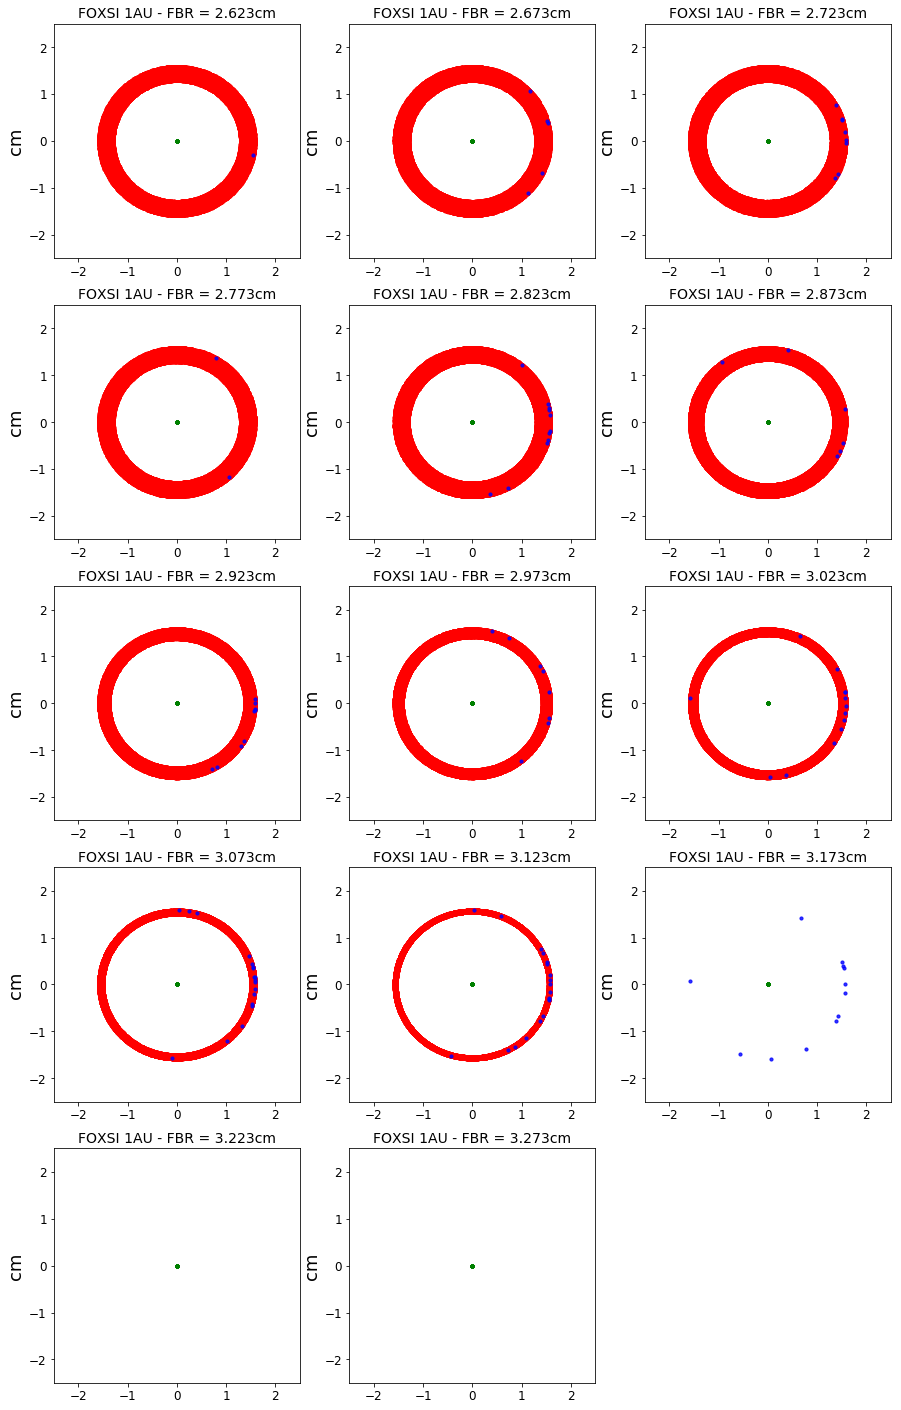

In [138]:
fig = plt.figure(figsize=(15,25))
for i, fbr in enumerate(fbrs):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - FBR = '+str(fbr)+'cm',fontsize=14)
    plt.ylabel('cm',fontsize=18)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(All_Hx[i],All_Hy[i],color='red',s=10.,alpha=0.8)
    plt.scatter(All_Px[i],All_Py[i],color='blue',s=10.,alpha=0.8)
    plt.scatter(All_Dx[i],All_Dy[i],color='green',s=10.,alpha=0.8)
    plt.ylim(-2.5,2.5)
    plt.xlim(-2.5,2.5)
plt.show()

### What about the Vignetting effect?

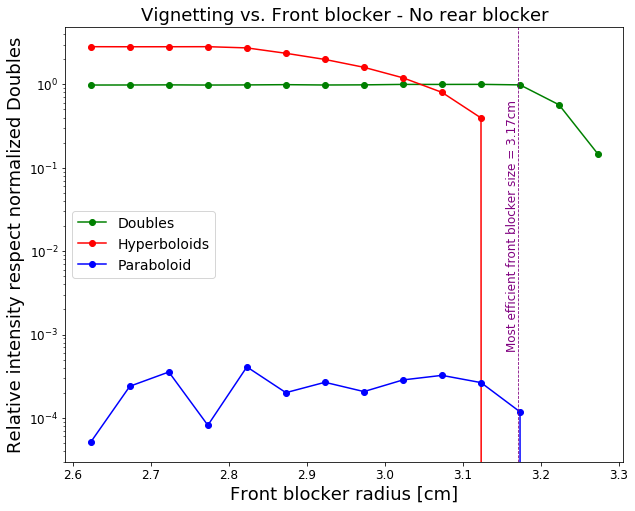

In [215]:
Rout = 3.29
Doubles, Hyp, Par = [], [], []
for i, fbr in enumerate(fbrs):
    Doubles.append(len(All_Drays[i]) * (Rout**2 - fbr**2))
    Hyp.append(len(All_Hrays[i]) * (Rout**2 - fbr**2))
    Par.append(len(All_Prays[i]) * (Rout**2 - fbr**2))

# Plotting :
fig = plt.figure(figsize=(10,8))
plt.title('Vignetting vs. Front blocker - No rear blocker',fontsize=18)
plt.semilogy(fbrs, Doubles/max(Doubles),'go-',label='Doubles')
plt.semilogy(fbrs, Hyp/max(Doubles),'ro-',label='Hyperboloids')
plt.semilogy(fbrs, Par/max(Doubles),'bo-',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Front blocker radius [cm]',fontsize=18)
plt.axvline(3.17,color='purple',linestyle='--',lw=0.8)
plt.text(3.155,5e-1,'Most efficient front blocker size = 3.17cm',rotation=90,fontsize=12,color='purple')
plt.legend(fontsize=14)
plt.show()

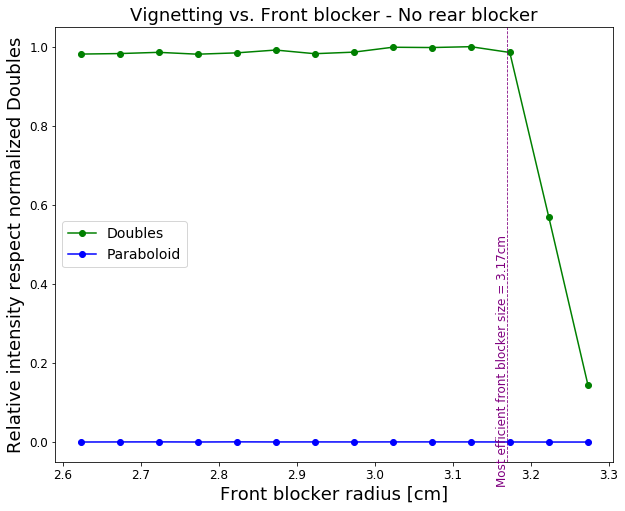

In [216]:
fig = plt.figure(figsize=(10,8))
plt.title('Vignetting vs. Front blocker - No rear blocker',fontsize=18)
plt.plot(fbrs, Doubles/max(Doubles),'go-',label='Doubles')
#plt.plot(fbrs, Hyp/max(Doubles),'ro-',label='Hyperboloids')
plt.plot(fbrs, Par/max(Doubles),'bo-',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Front blocker radius [cm]',fontsize=18)
plt.axvline(3.17,color='purple',linestyle='--',lw=0.8)
plt.text(3.155,5e-1,'Most efficient front blocker size = 3.17cm',rotation=90,fontsize=12,color='purple')
plt.legend(fontsize=14)
plt.show()

# Most efficient Front Blocker Size = 3.17cm 
## for a 10-shell FOXSI rockect module